In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

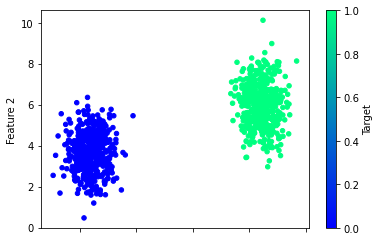

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 2ms/step - loss: 1.0673 - accuracy: 0.0547
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0235 - accuracy: 0.0853
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9849 - accuracy: 0.1093
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9504 - accuracy: 0.1360
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9204 - accuracy: 0.1640
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8931 - accuracy: 0.2000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8698 - accuracy: 0.2240
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8495 - accuracy: 0.2560
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8317 - accuracy: 0.2787
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8158 - accuracy: 0.3107
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.9160
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.9187
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.9213
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.9213
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.9227
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.9227
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.9280
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.9320
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2721 - accuracy: 0.9320
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9320


<AxesSubplot:>

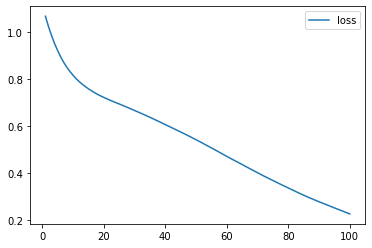

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

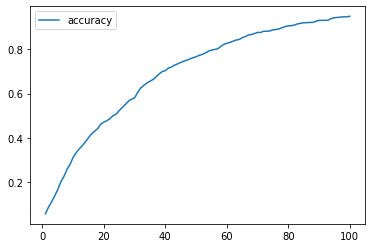

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2045 - accuracy: 0.9560 - 161ms/epoch - 20ms/step
Loss: 0.20453691482543945, Accuracy: 0.9559999704360962


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 75ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

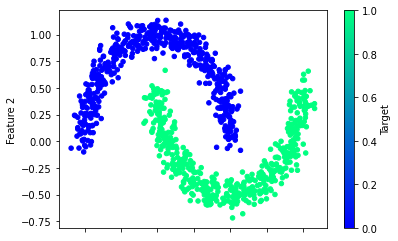

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.7498 - accuracy: 0.2467
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5339 - accuracy: 0.2667
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3740 - accuracy: 0.2747
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2614 - accuracy: 0.2920
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1762 - accuracy: 0.3053
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1107 - accuracy: 0.3227
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0582 - accuracy: 0.3360
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0143 - accuracy: 0.3453
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9765 - accuracy: 0.3653
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9453 - accuracy: 0.3787
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7440
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7427
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7413
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.7440
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7480
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7480
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7493
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7507
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7520
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7547


<AxesSubplot:>

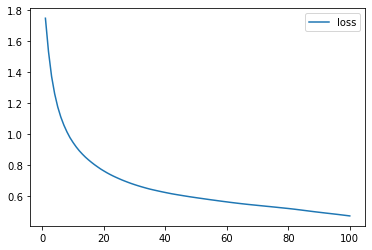

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

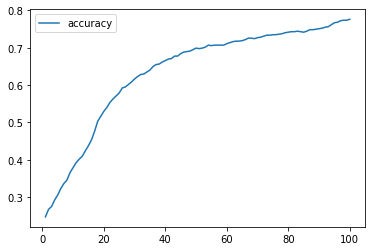

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.8375 - accuracy: 0.1787
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7809 - accuracy: 0.1627
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7362 - accuracy: 0.1680
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4907
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6640
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7040
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.7467
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.7627
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.7680
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7773
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9147
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9160
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9147
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9147
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9133
Epoch 88/100
24/24 [==============================] - 0s 995us/step - loss: 0.2117 - accuracy: 0.9133
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9133
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2101 - accuracy: 0.9133
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9147
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9147
Epoch 93/10